# Processamento de linguagem natural com Python

## Importação das bibliotecas

pip install -U pip setuptools wheel ✅ 
pip install -U spacy  
python -m spacy download en_core_web_sm  
python -m spacy download pt_core_news_sm  

In [1]:
pip install -U spacy

  Using cached spacy-3.8.2-cp312-cp312-win_amd64.whl.metadata (27 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached preshed-3.0.9-cp312-cp312-win_amd64.whl.metadata (2.2 kB)
  Using cached thinc-8.3.2-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-2.4.8-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached blis-1.0.1-cp312-cp312-win_amd64.whl.metadata (7.8 kB)
  Using cached confection-0.1.5-py3-none-any.whl.metadata (19 kB)
  Using cached numpy-2.0.2-cp312-cp312-win_amd64.whl.metadata (59 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached cloudpathlib-0.20.0-py3-none-any.whl.metadata (14 kB)
  Using cached marisa_trie-1.2.1-cp3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.0.2 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.


In [ ]:
import bs4 as bs
import urllib.request
import nltk
import spacy

In [ ]:
!python3 -m spacy download pt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.2 MB 1.1 MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.2.5-py3-none-any.whl size=21186281 sha256=3d7473a33610067c0ff49135c326018c999ec2e37bd47ada4164284568545be8
  Stored in directory: /tmp/pip-ephem-wheel-cache-7_de9vl4/wheels/c3/f9/0c/5c014a36941a00f5df5fc0756cb961d7c457a978e697a6ce3b
Successfully built pt-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


## Marcação POS

- POS (part-of-speech) atribui para as palavras partes da fala, como substantivos, adjetivos, verbos
- Importante para a detecção de entidades no texto, pois primeiro é necessário saber o que o texto contém
- Lista de tokens: https://spacy.io/api/annotation#pos-tagging
- Português: https://www.sketchengine.eu/portuguese-freeling-part-of-speech-tagset/

In [ ]:
pln = spacy.load('pt')
pln

In [ ]:
documento = pln('Estou aprendendo processamento de linguagem natural, curso em Curitiba')

In [ ]:
type(documento)

spacy.tokens.doc.Doc

In [ ]:
for token in documento:
  print(token.text, token.pos_)

Estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguagem NOUN
natural ADJ
, PUNCT
curso NOUN
em ADP
Curitiba PROPN


## Lematização e stemização

In [ ]:
for token in documento:
  print(token.text, token.lemma_)

Estou Estou
aprendendo aprender
processamento processamento
de de
linguagem linguagem
natural natural
, ,
curso cursar
em em
Curitiba Curitiba


In [ ]:
doc = pln('encontrei encontraram encontrarão encontrariam cursando curso cursei')
[token.lemma_ for token in doc]

['encontrar',
 'encontrar',
 'encontrar',
 'encontrar',
 'cursar',
 'cursar',
 'cursar']

In [ ]:
import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [ ]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('aprender')

'aprend'

In [ ]:
for token in documento:
  print(token.text, token.lemma_, stemmer.stem(token.text))

Estou Estou est
aprendendo aprender aprend
processamento processamento process
de de de
linguagem linguagem lingu
natural natural natur
, , ,
curso cursar curs
em em em
Curitiba Curitiba curitib


## Carregamento dos textos

In [ ]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [ ]:
#'https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial'

In [ ]:
#dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Inteligência_artificial')

In [ ]:
dados = dados.read()
dados

b'<!DOCTYPE html>\n<html class="client-nojs" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\\t.","\xc2\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","mar\xc3\xa7o","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"b226bae4-d47c-48e8-a022-744024b3de2e","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Intelig\xc3\xaancia_artificial","wgTitle":"Intelig\xc3\xaancia artificial","wgCurRevisionId":64379374,"wgRevisionId":64379374,"wgArticleId":12722,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!CS1 ingl\xc3\xaas-fontes e

In [ ]:
dados_html = bs.BeautifulSoup(dados, 'lxml')
dados_html

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","março","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"b226bae4-d47c-48e8-a022-744024b3de2e","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Inteligência_artificial","wgTitle":"Inteligência artificial","wgCurRevisionId":64379374,"wgRevisionId":64379374,"wgArticleId":12722,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!CS1 inglês-fontes em língua (en)","!CS1 manut: Nomes múltiplos: lista de autores","!CS1 manut: 

In [ ]:
paragrafos = dados_html.find_all('p')

In [ ]:
len(paragrafos)

107

In [ ]:
paragrafos[1]

<p class="sidebar-toc-title">
				Conteúdo
				<button class="vector-toc-uncollapse-button">move to sidebar</button>
<button class="vector-toc-collapse-button">Esconder</button>
</p>

In [ ]:
paragrafos[1].text

'\n\t\t\t\tConteúdo\n\t\t\t\tmove to sidebar\nEsconder\n'

In [ ]:
conteudo = ''
for p in paragrafos:
  conteudo += p.text

In [ ]:
conteudo

'\n\t\tPáginas para editores conectados saiba mais\n\n\t\t\t\tConteúdo\n\t\t\t\tmove to sidebar\nEsconder\nNa tecnologia, a Inteligência Artificial (de sigla: IA; do inglês: Artificial Intelligence, de sigla: AI) é a inteligência demonstrada por máquinas ao executar tarefas complexas associadas a seres inteligentes,[1] além de também ser um campo de estudo acadêmico,[2] onde seu principal objetivo é de executar funções de modo autônomo. \nÉ um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[3] É possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos para que no futuro possa agir de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capacidade de conseguir aplicar o raciocínio na

In [ ]:
conteudo = conteudo.lower()
conteudo

'\n\t\tpáginas para editores conectados saiba mais\n\n\t\t\t\tconteúdo\n\t\t\t\tmove to sidebar\nesconder\nna tecnologia, a inteligência artificial (de sigla: ia; do inglês: artificial intelligence, de sigla: ai) é a inteligência demonstrada por máquinas ao executar tarefas complexas associadas a seres inteligentes,[1] além de também ser um campo de estudo acadêmico,[2] onde seu principal objetivo é de executar funções de modo autônomo. \né um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[3] é possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos para que no futuro possa agir de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capacidade de conseguir aplicar o raciocínio na

## Buscas em textos com spaCy

In [ ]:
pln = spacy.load('pt')
pln

In [ ]:
string = 'turing'
token_pesquisa = pln(string)

In [ ]:
pln.vocab

In [ ]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, token_pesquisa)

In [ ]:
doc = pln(conteudo)
matches = matcher(doc)
matches

[(8661325627334373315, 3045, 3046),
 (8661325627334373315, 3055, 3056),
 (8661325627334373315, 3211, 3212),
 (8661325627334373315, 3216, 3217),
 (8661325627334373315, 3222, 3223),
 (8661325627334373315, 3285, 3286),
 (8661325627334373315, 3917, 3918),
 (8661325627334373315, 5192, 5193),
 (8661325627334373315, 8661, 8662),
 (8661325627334373315, 8797, 8798),
 (8661325627334373315, 8893, 8894),
 (8661325627334373315, 9010, 9011)]

In [ ]:
doc[2323:2324], doc[2323-5:2324+5]

(e,
 essas aprendizagens para atingir objetivos e tarefas específicas através de adaptação)

In [ ]:
doc[2333:2334], doc[2333-5:2334+5]

(,, adaptação flexível”.[15] john mccarthy, quem cunhou o termo em)

In [ ]:
matches[0], matches[0][1], matches[0][2]

((8661325627334373315, 3045, 3046), 3045, 3046)

In [ ]:
from IPython.core.display import HTML
texto = ''
numero_palavras = 50
doc = pln(conteudo)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f"""<p><strong>Resultados encontrados:</strong> {len(matches)}</p>"""))
for i in matches:
  inicio = i[1] - numero_palavras
  if inicio < 0:
    inicio = 0
  texto += str(doc[inicio:i[2] + numero_palavras]).replace(string, f"<mark>{string}</mark>")
  texto += "<br /><br />"
display(HTML(f"""... {texto} ... """))

## Extração de entidades nomeadas

- NER (Named-Entity Recognition)
- Encontrar e classificar entidades no texto, dependendo da base de dados que foi utilizada para o treinamento (pessoa, localização, empresa, numéricos)
- Usado em chatbots para saber o assunto falado
- Siglas: https://spacy.io/api/annotation#named-entities

In [ ]:
for entidade in doc.ents:
  print(entidade.text, entidade.label_)

segunda guerra mundial MISC
computing machinery and intelligence MISC
alan PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
frankenstein MISC
circulares.[9 MISC
google ORG
wikipédia MISC
john mccarthy PER
racionalmente".[10][11 MISC
aristóteles PER
alexandre PER
herbert simon PER
john mccarthy PER
problem solver PER
gps PER
newell PER
gps ORG
brasil LOC
associação brasileira de inteligência artificial ORG
allen newell PER
herbert simon PER
universidade carnegie mellon ORG
marvin minsky PER
mit ai lab MISC
conferência de verão de 1956 MISC
darthmouth college.[14 LOC
advanced research projects agency” ORG
estados unidos LOC
generation project” MISC
japão LOC
andreas kaplan PER
michael haenlein PER
john mccarthy PER
gubern PER
román LOC
inteligente[16 LOC
john haugeland PER
good old-fashioned artificial intelligence MISC
w. grey walter PER
johns hopkins PER
universidade de princeton LOC
club ORG
inglaterra LOC
david rumelhart

In [ ]:
from spacy import displacy
displacy.render(doc, style = 'ent', jupyter = True)

## Nuvem de palavras e stop words

In [ ]:
from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)

{'nosso', 'ir', 'máximo', 'minha', 'foste', 'favor', 'longe', 'parece', 'sou', 'tempo', 'diante', 'dizem', 'esteve', 'poder', 'dão', 'quinta', 'dentro', 'seu', 'todos', 'meio', 'nossa', 'quieto', 'sexta', 'estão', 'boa', 'usar', 'puderam', 'à', 'corrente', 'menos', 'nunca', 'forma', 'esses', 'teu', 'dizer', 'apoia', 'pois', 'através', 'teve', 'tiveram', 'no', 'algumas', 'dá', 'oitava', 'os', 'dez', 'próximo', 'quarto', 'perto', 'final', 'tais', 'ademais', 'eles', 'vai', 'tenho', 'onze', 'ao', 'mesmo', 'maioria', 'aqui', 'adeus', 'oito', 'têm', 'diz', 'grandes', 'poderá', 'enquanto', 'era', 'inclusive', 'ali', 'conhecida', 'contra', 'vens', 'outras', 'tudo', 'sem', 'uma', 'aí', 'nessa', 'seria', 'eu', 'fazemos', 'breve', 'como', 'um', 'ou', 'sei', 'nenhuma', 'tipo', 'então', 'vossos', 'estive', 'tiveste', 'qualquer', 'devem', 'tanto', 'cada', 'são', 'posição', 'dessa', 'não', 'põe', 'nuns', 'pegar', 'terceira', 'vem', 'naquela', 'certeza', 'tentei', 'primeiro', 'lado', 'cuja', 'porém', 

In [ ]:
len(STOP_WORDS)

413

In [ ]:
pln.vocab['usa'].is_stop

True

In [ ]:
doc = pln(conteudo)
lista_token = []
for token in doc:
  lista_token.append(token.text)

In [ ]:
print(lista_token)

['\n\t\t', 'páginas', 'para', 'editores', 'conectados', 'saiba', 'mais', '\n\n\t\t\t\t', 'conteúdo', '\n\t\t\t\t', 'move', 'to', 'sidebar', '\n', 'esconder', '\n', 'na', 'tecnologia', ',', 'a', 'inteligência', 'artificial', '(', 'de', 'sigla', ':', 'ia', ';', 'do', 'inglês', ':', 'artificial', 'intelligence', ',', 'de', 'sigla', ':', 'ai', ')', 'é', 'a', 'inteligência', 'demonstrada', 'por', 'máquinas', 'a', 'o', 'executar', 'tarefas', 'complexas', 'associadas', 'a', 'seres', 'inteligentes,[1', ']', 'além', 'de', 'também', 'ser', 'um', 'campo', 'de', 'estudo', 'acadêmico,[2', ']', 'onde', 'seu', 'principal', 'objetivo', 'é', 'de', 'executar', 'funções', 'de', 'modo', 'autônomo', '.', '\n', 'é', 'um', 'conceito', 'amplo', 'e', 'que', 'recebe', 'tantas', 'definições', 'quanto', 'significados', 'diferentes', 'à', 'palavra', 'inteligência.[3', ']', 'é', 'possível', 'considerar', 'algumas', 'características', 'básicas', 'd', 'esses', 'sistemas', ',', 'como', 'a', 'capacidade', 'de', 'racioc

In [ ]:
len(lista_token)

9944

In [ ]:
sem_stop = []
for palavra in lista_token:
  if pln.vocab[palavra].is_stop == False:
    sem_stop.append(palavra)

In [ ]:
print(sem_stop)

['\n\t\t', 'páginas', 'editores', 'conectados', 'saiba', '\n\n\t\t\t\t', 'conteúdo', '\n\t\t\t\t', 'move', 'to', 'sidebar', '\n', 'esconder', '\n', 'tecnologia', ',', 'a', 'inteligência', 'artificial', '(', 'sigla', ':', 'ia', ';', 'inglês', ':', 'artificial', 'intelligence', ',', 'sigla', ':', 'ai', ')', 'a', 'inteligência', 'demonstrada', 'máquinas', 'a', 'o', 'executar', 'tarefas', 'complexas', 'associadas', 'a', 'seres', 'inteligentes,[1', ']', 'campo', 'estudo', 'acadêmico,[2', ']', 'principal', 'objetivo', 'executar', 'funções', 'modo', 'autônomo', '.', '\n', 'conceito', 'amplo', 'e', 'recebe', 'tantas', 'definições', 'significados', 'diferentes', 'palavra', 'inteligência.[3', ']', 'considerar', 'características', 'básicas', 'd', 'sistemas', ',', 'a', 'capacidade', 'raciocínio', '(', 'aplicar', 'regras', 'lógicas', 'a', 'conjunto', 'dados', 'disponíveis', 'chegar', 'a', 'conclusão', ')', ',', 'aprendizagem', '(', 'aprender', 'erros', 'e', 'acertos', 'futuro', 'possa', 'agir', 'ma

In [ ]:
len(sem_stop)

6607

In [ ]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])

In [ ]:
from wordcloud import WordCloud
cloud = WordCloud(background_color = 'white', max_words = 100, colormap=color_map)

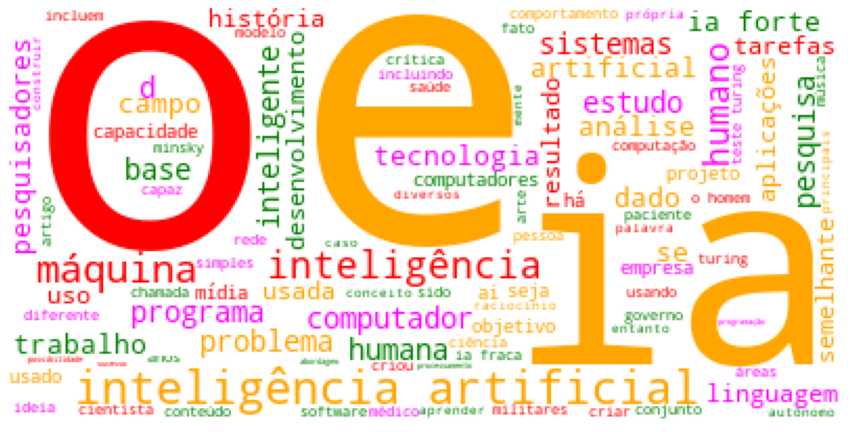

In [ ]:
import matplotlib.pyplot as plt
cloud = cloud.generate(' '.join(sem_stop))
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()